## Machine Learning Techniques

### Introduction
In the previous weeks, we have learnt how to import data, visualize them and process them, so that they are ready to be used for the next step in the AI process - Modelling.

There are many different types of machine learning techniques which can be used to run different machine learning tasks such as classification, regression, and clustering. In this session, we will create our own models to make predictions, cluster data, etc. The skills you will gain here will be used again in the kaggle competitions!

As explored previously, there are 2 main types of machine learning algorithms we want to explore: Supervised learning and unsupervised learning. Do you still remember the difference between the two?

In [15]:
import pandas as pd
import numpy as np

### Supervised Learning Techniques
Have you used the video sharing site Youtube before? Do you realise that it will recommend videos that it thinks you will like to watch? Do you notice that the videos recommended to you will be different compared to the videos recommended to your friends? How do you think it can do that?

The Youtube recommendation technology uses something known as supervised learning techique. Every time you 'like' a video, Youtube will record down the information of the video: Its name, genre, length, uploaders, etc. The more you watch and 'like' videos, the more information will be recorded into the system.

This data set will be used to train a supervised learning model which will then predict which video you might like. This is done by analysing the videos you have watched and 'liked', and looking at the similarities between the video information. In this case, the videos that you liked previously will be the features or the data that the model will train. On the other hand, the videos that you most likely will want to watch (watched by other people who liked the same videos as you) will be the labels or the targets to the model/technique. The model/technique essentially tries and "match" the features to the labels.

Supervised learning techniques requires training data that is **labelled**. For example, in the previous example, a video can either be liked, not rated, or disliked. These are the **labels** that are necessary in the training data when training the model. With more training data, a more accurate model can be made.

Label has to be appropriate. For example, if you want to predict the exam scores of a student given the number of hours spent studying, then the data must contain the exam scores for each student. This will allow the machine learning algorithm to learn from the examples given.

Another important term in supervised learning techniques is '**features**'. Features refer to the data that can be used to predict the target or label. Based on the example of the exam scores, the exam scores are the target and the number of hours spent studying is a **feature**. Other features for that example can include the number of questions practiced, amount of sleep before the exam, etc.

With the features and labels/targets, the algorithm will then be able to "learn" the relationship between the features and labels/targets.

Supervised learning techniques can be used to either classify data into different groups or to predict the relationships between variables. Techniques that classify data return categories or groups. For example, if we want to predict whether there will be rain tomorrow, we can use an algorithm that will return categories such as raining or sunny. On the other hand, techniques that are used for regression return numerical solutions. For example, if we want to predict the amount of rain tomorrow, we can use an alogrithm than will return numbers instead of categories.

After understanding what is supervised learning, we will now explore the different supervised learning techniques!

### K-Nearest-Neighbours (KNN)

Look at the graph! These are the height and weight samples of male and female. Notice how they are grouped together. Males tend to be taller and heavier as compared to females, and you can see that there is a noticeable grouping.

![KNN graph](assets/KNN1.JPG)

Now, look at the green dot, the unknown input. Looking at the data, would you say that the unknown input belong to the male data or the female data? Why? How would you determine that?

Well, you can see that they are closer to the male data, and thus it is more likely that the unknown data represents a male as well. This method of determining a group by its distance to other, already known data points, is called the K-nearest neighbours

K-Nearest Neighbours (KNN) can be used in classification or regression problems. However, it is mainly used for classification problems. As the name suggests, this algorithm relies on the surrounding points or neighbours to determine its class or group. For example, if you are trying to classify an unknown point as either class A or class B using KNN and the majority of the points nearest to the unknown point are in class A, which class do you think the unknown point will be in?

If you guessed class A, your answer is right. This is because KNN utilises the properties of the majority of the nearest points to decide how to classify unknown points. This is similar to the famous phrase "birds of the same feather, flock together". Likewise, you will expect points that are similar to be close to each other.

Watch this [video](https://www.youtube.com/watch?v=MDniRwXizWo) to find out more about KNN. What are the main advantages and disadvantages of KNN? You will be using KNN in subsequent exercises. This is because it is an easy to use and flexible algorithm which can be used for many problems.

After understanding how KNN works, lets try to apply it to a hypothetical scenario. In this scenario, you want to predict if a device is a laptop or a computer using features such as price and amount of memory. As such, you plotted a scatter plot for all the data points that you have.

![KNN hypothetical](assets/KNN.jpg)

The x-axis shows the amount of memory (GB) whereas the y-axis shows the price (USD). The blue circles are data points for desktop whereas the orange circles are data points for laptops. The star represents the unknown point.

Based on your understanding of KNN, will the unknown point be a desktop or laptop if we were to apply KNN with 3 nearest neighbours? Will your answer change if you were to use 4 nearest neighbours or 5 nearest neighbours? How about if you were to use 9 nearest neighbours?

Did you realise that the unknown point will change its classification if you were to use 9 nearest neighbours? From the graph, it is quite obvious that the unknown point is not a desktop. However, due to KNN using the majority, it is possible for KNN to wrongly classify an unknown point if the wrong number of nearest neighbours were used. Thus, it is always important to identify the best number of nearest neighbours. We will see how this is done in the next few notebooks when we learn how to tune the models! For now, it is sufficient to just understand why the number of neighbours is an important parameter in K nearest neighbours.

### Classifying flowers using KNN and the Iris Flower dataset

Let us now apply the KNN technique to the Iris Flower dataset. First, load the previously used Iris Flower dataset as a pandas dataframe.

In [3]:
df = pd.read_csv('datasets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Setting up data for the KNN algorithm

Let us try to use KNN to classify the dataset with the type of flower or class being the target variable. To help us do so, we need to convert the categorical classes into numbers so that it can be understood easier by the computer. We can do so through the usage of **label encoding**.

#### Label Encoding
Label encoding refers to the assignment of a number for each category. For example, if you have to predict the weather and there are two classes, rainy or sunny, we can label rainy as 0 and sunny as 1 (see table below). In this way, we can convert the categories to numbers.

![Label encoding example](assets/Label2.JPG)

How would you apply label encoding to the iris dataset?

We can convert the class/flower type in the Iris Flower dataset into numbers. What are the different classes within the dataset? How many classes are there in total?

Now, label encode the different classes. 'Setosa' can be 1, 'Versicolor' can be 2 and 'Virginica' can be 3.

In [4]:
print(df['Class'].value_counts()) # Count the number of each class

Setosa        50
Versicolor    50
Virginica     50
Name: Class, dtype: int64


In [5]:
# dictionary to map class to number
class_to_num = {"Class" : {'Setosa': 1, 'Versicolor': 2, 'Virginica': 3}}

# use replace function to map class to number
df.replace(class_to_num, inplace=True)
print(df["Class"].value_counts()) # print the number of data points to check if each class has been changed to a number

1    50
2    50
3    50
Name: Class, dtype: int64


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**Bonus: There is also another method to convert categories to numbers. The method is known as one-hot encoding. One-hot encoding changes the categories into binary (0 or 1) categories. For example, if you have raining or sunny days as categories, one hot encoding will add 2 more columns, rainy and sunny, to the dataframe. If the data point shows rainy, it will be converted to a value of 1 under the raining column and a value of 0 under the sunny column (see table below). Read this [article](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) to find out more about one-hot encoding. Now, read this [article](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example) to learn how to do one-hot encoding for pandas. Import the Iris Flower dataset again as df2 and conduct the one-hot encoding for it.**

![One hot encoding](assets/Label1.JPG)

In [7]:
df2 = pd.read_csv('datasets/iris.csv')
df2 = pd.get_dummies(df2, prefix=['Class']) # the get_dummies function will convert the class column into 3 columns, one for each class in this example
df2.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Class_Setosa,Class_Versicolor,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


Great! You've learnt how to conduct label encoding and one-hot encoding. We can now try out the KNN algorithm. We first have to import the KNN algorithm from scikit learn. [Scikit learn](https://scikit-learn.org/stable/) is an open source python library which contains numerous popular machine learning algorithms. What does scikit learn contain? What can it do? See the listed [examples](https://scikit-learn.org/stable/auto_examples/index.html) for inspiration! Are you brimming with excitement now?

In [8]:
from sklearn.neighbors import KNeighborsClassifier

Read this [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to find out how to use the KNeighborsClassifier from sklearn. Do you remember from earlier in this notebook that the number of neighbours is required for KNN? From the link, what is the default number of neighbors used?

Let us use the default number of neighbors to try and classify the Iris Flower dataset.

We will only use 2 features (sepal_length and sepal_width) initially. In the code below, these are included in the 'x' dataframe. The 'class' of the flower i.e. the name of the flower species will be the 'label', included in the 'y' dataframe.

In [9]:
# Initialise the KNeighborsClassifier
KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['sepal_length','sepal_width']]
y = df['Class']

# Print .head() of x and y to make sure the data is correct
print(x.head())
print(y.head())

   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


In [10]:
# Train KNN using the x and y values. This is done through the .fit method.
KNN = KNN.fit(x,y)

In [11]:
# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3.We can use the .predict method to do so.
# We will also test it with sepal length = 8 and sepal_width = 3.5
test = pd.DataFrame()
test['sepal_length'] = [5,8]
test['sepal_width'] = [3,3.5]
test.head()


,sepal_length,sepal_width
0,5,3.0
1,8,3.5


In [12]:
predict_flower = KNN.predict(test)

# Print predict_flower
print(predict_flower)

[1 3]


From the output above, do you know which flower type was predicted for a data point with sepal length = 5 and sepal width = 3? Remember our encoding earlier?

It predicted Setosa!

What if the sepal length = 3 and sepal width = 5?

In [13]:
test2 = pd.DataFrame()
test2['sepal_length'] = [3]
test2['sepal_width'] = [5]
predict_flower = KNN.predict(test2)

# Print predict_flower
print(predict_flower)

[1]


You have trained your first supervised learning model. However, we only used 2 variables. Train another KNN model named KNN2 with all the other variables ('sepal_length','sepal_width','petal_length','petal_width') instead of just sepal length and sepal width.

In [14]:
x1 = df[['sepal_length','sepal_width','petal_length','petal_width']]
y1 = df['Class']
KNN2 = KNN.fit(x1,y1)

Using your new model, can you predict the flower type with sepal_length = 5.8, sepal_width = 2.3, petal_length = 5.0 and petal_width = 1.3?

In [15]:
test = pd.DataFrame()
test['sepal_length'] = [5.8]
test['sepal_width'] = [2.3]
test["petal_length"] = [5.0]
test["petal_width"] = [1.3]
predict_flower = KNN2.predict(test)
print(predict_flower)

[2]


2 so versicolor

Great! You have used the k-nearest neighbour algorithm to train a classification model that can classify the types of flower given the characteristics of the flowers such as the sepal length, sepal width , petal length , and the petal width.

If you want to learn more about the KNN algorithm and about the mathematics behind it, you can do so [here](https://www.ibm.com/topics/knn)

There are many models that can be used for classification. Next, we will explore the decision tree to help us with classification as well.

Here is a visualization of how the KNN boundaries look like (You can search the functions used in this code block to understand what it does on your own)

In [29]:
x2 = df[['petal_length','petal_width']]
y2 = df['Class']

KNN3 = KNeighborsClassifier()
KNN3.fit(x2,y2)

length_min, length_max = x2['petal_length'].min() - 0.1, x2['petal_length'].max() + 0.1
width_min, width_max = x2['petal_width'].min() - 0.1, x2['petal_width'].max() + 0.1

xx, yy = np.meshgrid(np.linspace(length_min, length_max, 100), np.linspace(width_min, width_max, 100))
boundaries = KNN3.predict(np.c_[xx.ravel(), yy.ravel()])
boundaries = boundaries.reshape(xx.shape)

c:\Users\trail\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


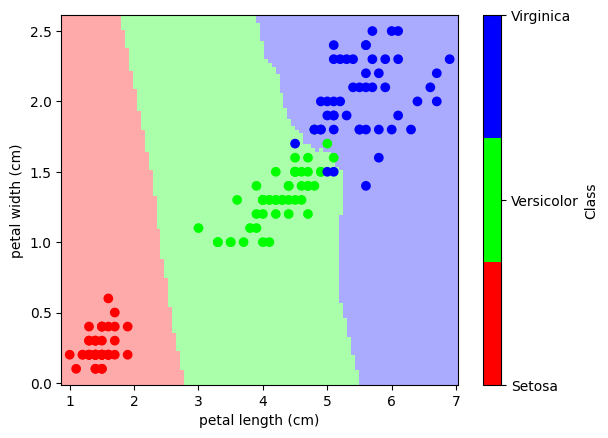

In [36]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(2)
plt.pcolormesh(xx, yy, boundaries, cmap = cmap_light)
plt.scatter(df["petal_length"], df["petal_width"], c=df["Class"], cmap = cmap_bold)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.colorbar(ticks=[1, 2, 3], label="Class", format = plt.FuncFormatter(lambda val, loc: ['Setosa', 'Versicolor', 'Virginica'][val-1]))
plt.show()